# Tugas-Pendata-DecisionTree

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cuaca.csv to Cuaca.csv


In [ ]:
import pandas as pd
df = pd.read_csv('Cuaca.csv')
pd.DataFrame(df)

,NO,OUTLOOK,TEMP.,HUMIDITY,WIND,PLAY TENNIS
0,1,Sunny,Hot,High,False,No
1,2,Sunny,Hot,High,True,No
2,3,Overcast,Hot,High,False,Yes
3,4,Rain,Mild,High,False,Yes
4,5,Rain,Cool,Normal,False,Yes
5,6,Rain,Cool,Normal,True,No
6,7,Overcast,Cool,Normal,False,Yes
7,8,Sunny,Mild,High,False,No
8,9,Sunny,Cool,Normal,False,Yes
9,10,Rain,Mild,Normal,True,Yes


**Perhitungan Entropy**

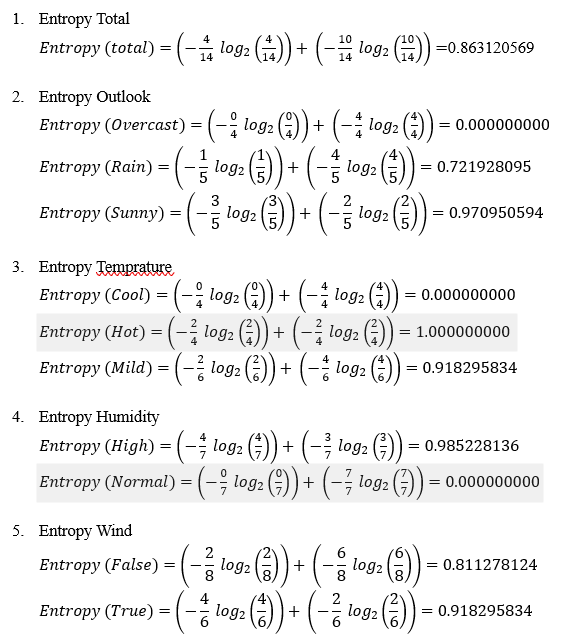

**Perhitungan Gain**

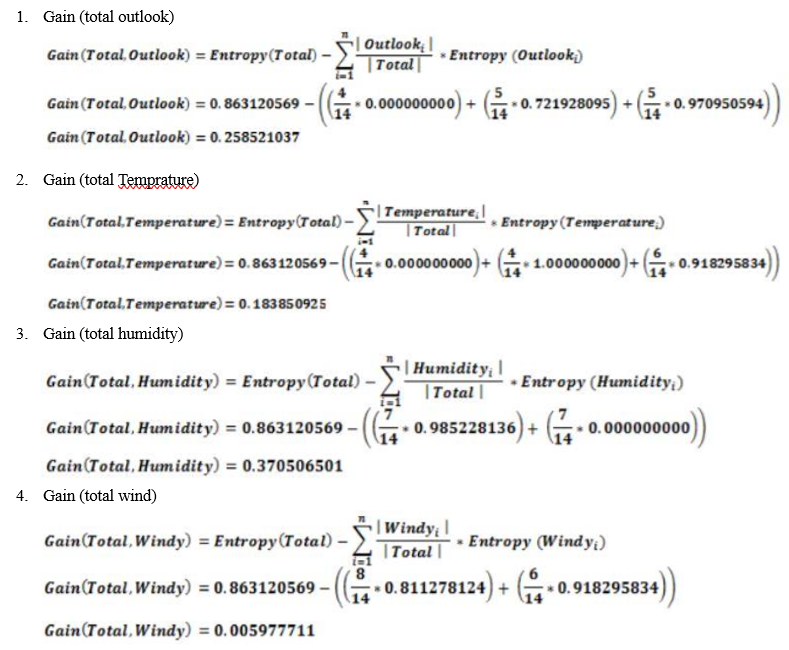

**Memasukan hasil perhitungan masing-masing entropy dan gain pada tabel**

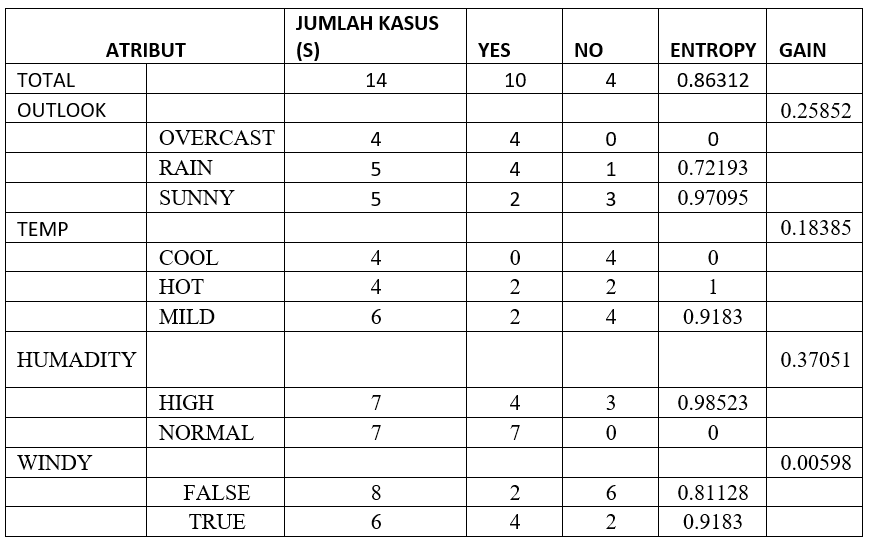

**Kemudian gain yang tertinggi yaitu humidity sebesar 0.37051 dapat menjadi node akar, lalu dilanjutkan dari gain tertinggi ke gain terendah.**

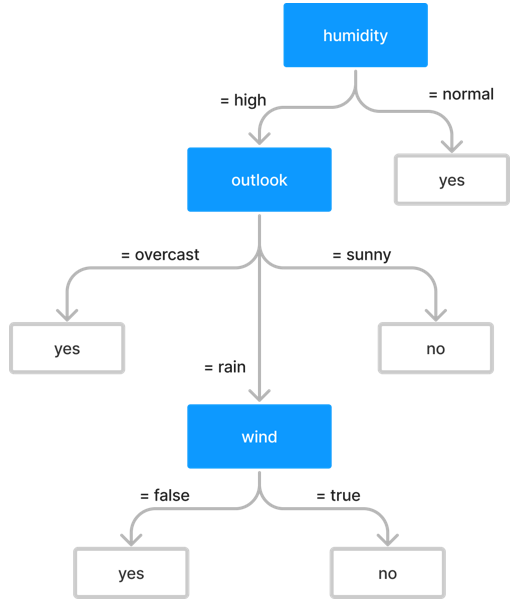

# Decision Tree data weather dengan menggunakan python

In [ ]:
from sklearn import tree 
import pandas as pd 
import pydotplus # untuk membuat tree
from IPython.display import Image  # untuk menampilkan tree

In [ ]:
table_tennis = pd.DataFrame()

#outlook
table_tennis['Outlook'] = ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 
                     'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast',
                     'overcast', 'rainy']

#temp
table_tennis['Temperature'] = ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool',
                         'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild']

#humidity
table_tennis['Humidity'] = ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal',
                      'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high']

#windy
table_tennis['Windy'] = ['false', 'true', 'false', 'false', 'false', 'true', 'true',
                   'false', 'false', 'false', 'true', 'true', 'false', 'true']

#play tennis
table_tennis['Play_Tennis'] = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 
                  'yes', 'yes', 'no']

pd.DataFrame(table_tennis)

,Outlook,Temperature,Humidity,Windy,Play_Tennis
0,sunny,hot,high,false,no
1,sunny,hot,high,true,no
2,overcast,hot,high,false,yes
3,rainy,mild,high,false,yes
4,rainy,cool,normal,false,yes
5,rainy,cool,normal,true,no
6,overcast,cool,normal,true,yes
7,sunny,mild,high,false,no
8,sunny,cool,normal,false,yes
9,rainy,mild,normal,false,yes


**mengubah data menjadi binary**

In [ ]:
one_hot_data = pd.get_dummies(table_tennis[ ['Outlook', 'Temperature', 'Humidity', 'Windy'] ])
one_hot_data

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_false,Windy_true
0,0,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,1,1,0,1,0
4,0,1,0,1,0,0,0,1,1,0
5,0,1,0,1,0,0,0,1,0,1
6,1,0,0,1,0,0,0,1,0,1
7,0,0,1,0,0,1,1,0,1,0
8,0,0,1,1,0,0,0,1,1,0
9,0,1,0,0,0,1,0,1,1,0


**Klasifikasi pohon keputusan:**

In [ ]:
clf = tree.DecisionTreeClassifier()
clf_train = clf.fit(one_hot_data, table_tennis['Play_Tennis'])

**Decision tree:**

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="x[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]"] ;
1 [label="x[7] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="x[1] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
2 -> 3 ;
4 [label="x[9] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
2 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
4 -> 6 ;
7 [label="x[9] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]"] ;
1 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
7 -> 8 ;
9 [label="x[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
9 -> 10 ;
11 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
9 -> 11 ;
12 [label="gini = 0.0\nsam

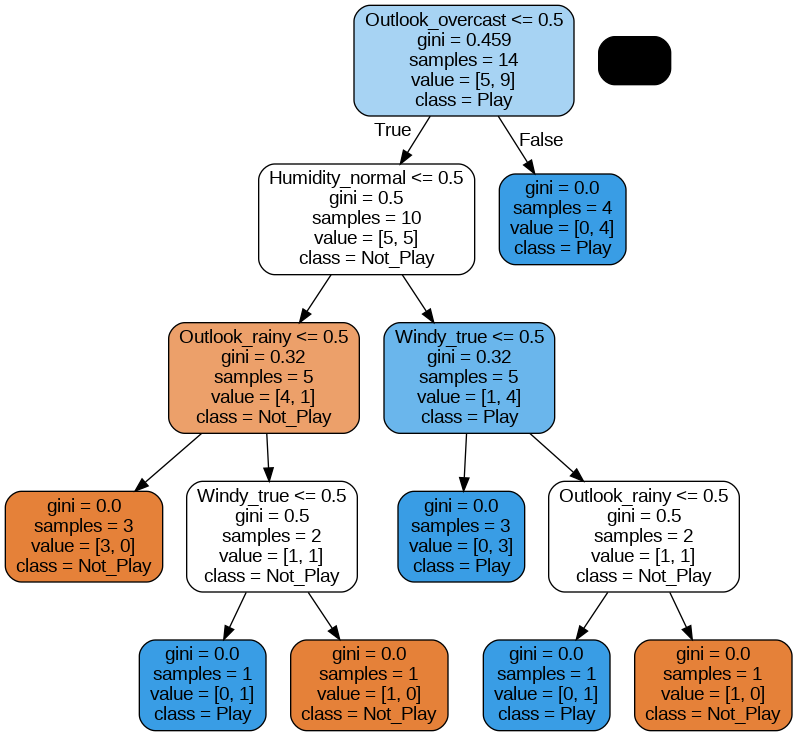

In [ ]:
print(tree.export_graphviz(clf_train, None))

dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(one_hot_data.columns.values), 
                                class_names=['Not_Play', 'Play'], rounded=True, filled=True) 

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())